# Assignment 4

We consider the eczema medical trial data set using the non-hierarchical model where all studies have the same probability of success.

|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


**Model 1:**

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

# Test Statistic

Our test statistic is the size of the interquartile range of the success rates from each iteration of trials i.e. each time we run 6 experiments with the eczema data. I debated between the interquartile range and standard deviation, concluding that the former is appropriate since it captures the spread of the data but is not extremely sensitive to outliers. Given that subjects in a medical trial can have outlier demographic characteristics, I wanted to capture the performance of the eczema drug on average. However, note that a holistic evaluation of the drug's mechanism should find a way to consider the outlier cases. 

So, given a dataset of succeses, we first compute the success rate and then calculate the difference between the 75th percentile and the 25th percentile. 

In [0]:
# import libraries

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [0]:
def test_statistic(data):
    #compute success rates for each individual study, depending on the size of the original cohort in that sutdy 
    success_rates = [data[i]/cohort_size[i] for i in range(len(cohort_size))]
    iqr_range = np.percentile(success_rates, 75, interpolation='midpoint') - np.percentile(success_rates, 25, interpolation='midpoint')
    return iqr_range

In [0]:
#posterior hyperparameters 

alpha_control = 58
beta_control = 65

In [0]:
# posterior distributions for control studies

posterior_control = stats.beta(alpha_control, beta_control)

In [0]:
# count of successes in the experiment
control_success = [9, 11, 4, 21, 12, 0]

# count of cohort size in the experiment
cohort_size = [6, 7, 6, 18, 17, 10]

In [6]:
actual_test_statistic = test_statistic(control_success)
print('The test statistic for the original studies is', actual_test_statistic)

The test statistic for the original studies is 0.6470588235294119


In [7]:
#Generate samples from the posterior distribution 
posterior_samples = posterior_control.rvs(size=1000)

generated_test_results = [] #initialize empty list to store the iqr range for each iteration of all six experiments

# Now, generate a replicate dataset from the likelihood function by conditioning on the sampled θ.
for i in posterior_samples:
    #the replicates list has six integers for each control group trials
    for j in range(len(cohort_size)):
      replicates = [int(stats.binom.rvs(cohort_size[j],i,size=1)) for j in range(len(cohort_size))]
      # control_size[j] is important because each replicated cohort needs to have the same size as the real cohort, to make sure their statistical behavior is the same.
    generated_test_results.append(test_statistic(replicates)) #results are appended to generated_test_results and iterations continues for the number of samples we drew from the posterior 
    
print('The test statistic, on average, for the replicated studies is', np.mean(generated_test_results))

The test statistic, on average, for the replicated studies is 0.14009906629318392


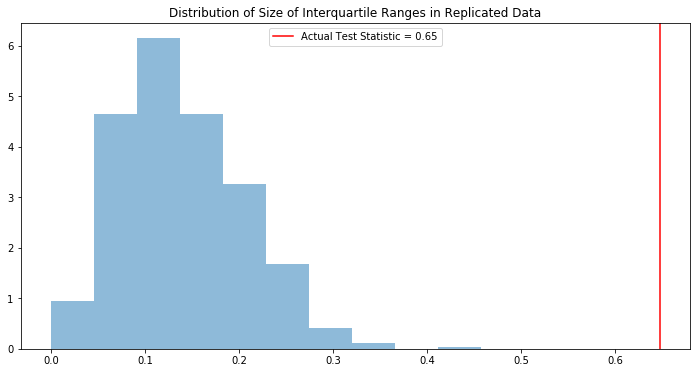

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(generated_test_results, alpha=0.5, density=True)
plt.title("Distribution of Size of Interquartile Ranges in Replicated Data")
plt.axvline(actual_test_statistic, color='red', linewidth=1.5, label = "Actual Test Statistic = 0.65")
plt.legend(loc='upper center')
plt.show()

In [9]:
p_val = np.mean(generated_test_results>actual_test_statistic)
print(p_val)

0.0
